In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df  = pd.read_csv("KNN_Project_Data")

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler()

In [7]:
scaled_features=scaler.transform(df.drop("TARGET CLASS",axis=1))

In [8]:
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [9]:
df_scaled=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [10]:
df_scaled

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


In [11]:
df_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=df_scaled

In [14]:
y=df["TARGET CLASS"]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
predict =  knn.predict(x_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       149
           1       0.73      0.74      0.73       151

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



In [22]:
print(confusion_matrix(predict,y_test))

[[108  41]
 [ 40 111]]


In [24]:
error_rate=[]
for i in range(1,40):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(x_train,y_train)
    predict = kn.predict(x_test)
    error_rate.append(np.mean(predict != y_test))

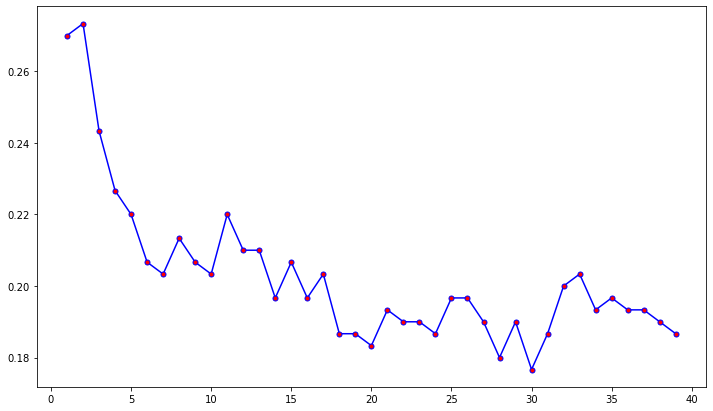

In [25]:
plt.figure(figsize=(12,7))
plt.plot(range(1,40),error_rate,color='blue', marker='o',
         markerfacecolor='red', markersize=5)

In [27]:
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

In [28]:
print("WHEN K=30")
print("\n")
print(confusion_matrix(y_test,predict))
print('\n')
print(classification_report(y_test,predict))

WHEN K=30


[[109  39]
 [ 17 135]]


              precision    recall  f1-score   support

           0       0.87      0.74      0.80       148
           1       0.78      0.89      0.83       152

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300

